In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insuarance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

No null values except _c39 columns.

In [8]:
df.drop('_c39',axis=1,inplace=True)

In [9]:
df.shape

(1000, 39)

we need to change object data type into numeric.

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_bind_date']=le.fit_transform(df['policy_bind_date'])
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_date']=le.fit_transform(df['incident_date'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])

df['incident_location']=le.fit_transform(df['incident_location'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])
 
df['collision_type']=le.fit_transform(df['collision_type'])

In [12]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


In [13]:
df_cor=df.corr()
df_cor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


fraud reported is highly correlated with vehicle_claim.
fraud reported is least correlated with incident_severity.

In [14]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

<AxesSubplot:>

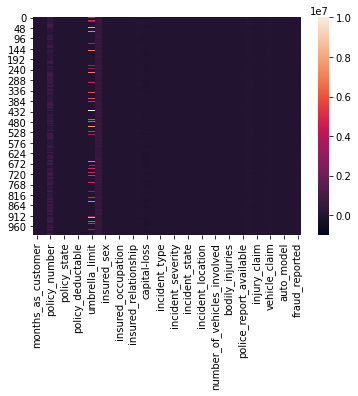

In [15]:
sns.heatmap(df)

No Null values.

<AxesSubplot:>

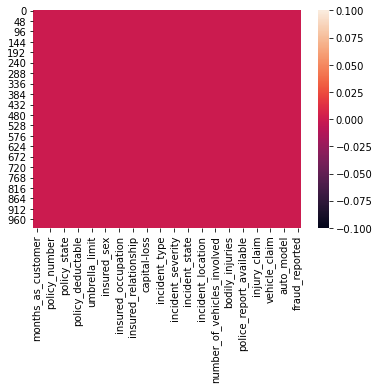

In [16]:
sns.heatmap(df.isnull())

No Null Values.

<AxesSubplot:>

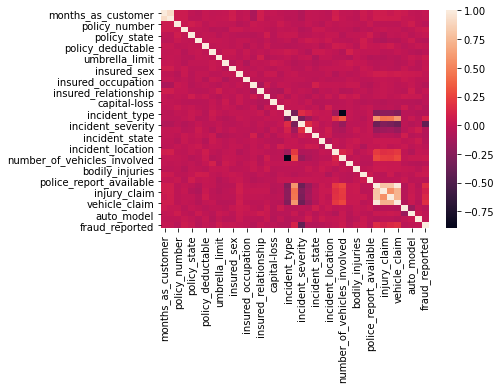

In [17]:
sns.heatmap(df_cor)

fraud reported is highly correlated with total_claim_amount,injury_claim,property_claim and vehicle_claim.
fraud reported is least correlated with incident_severity

<AxesSubplot:>

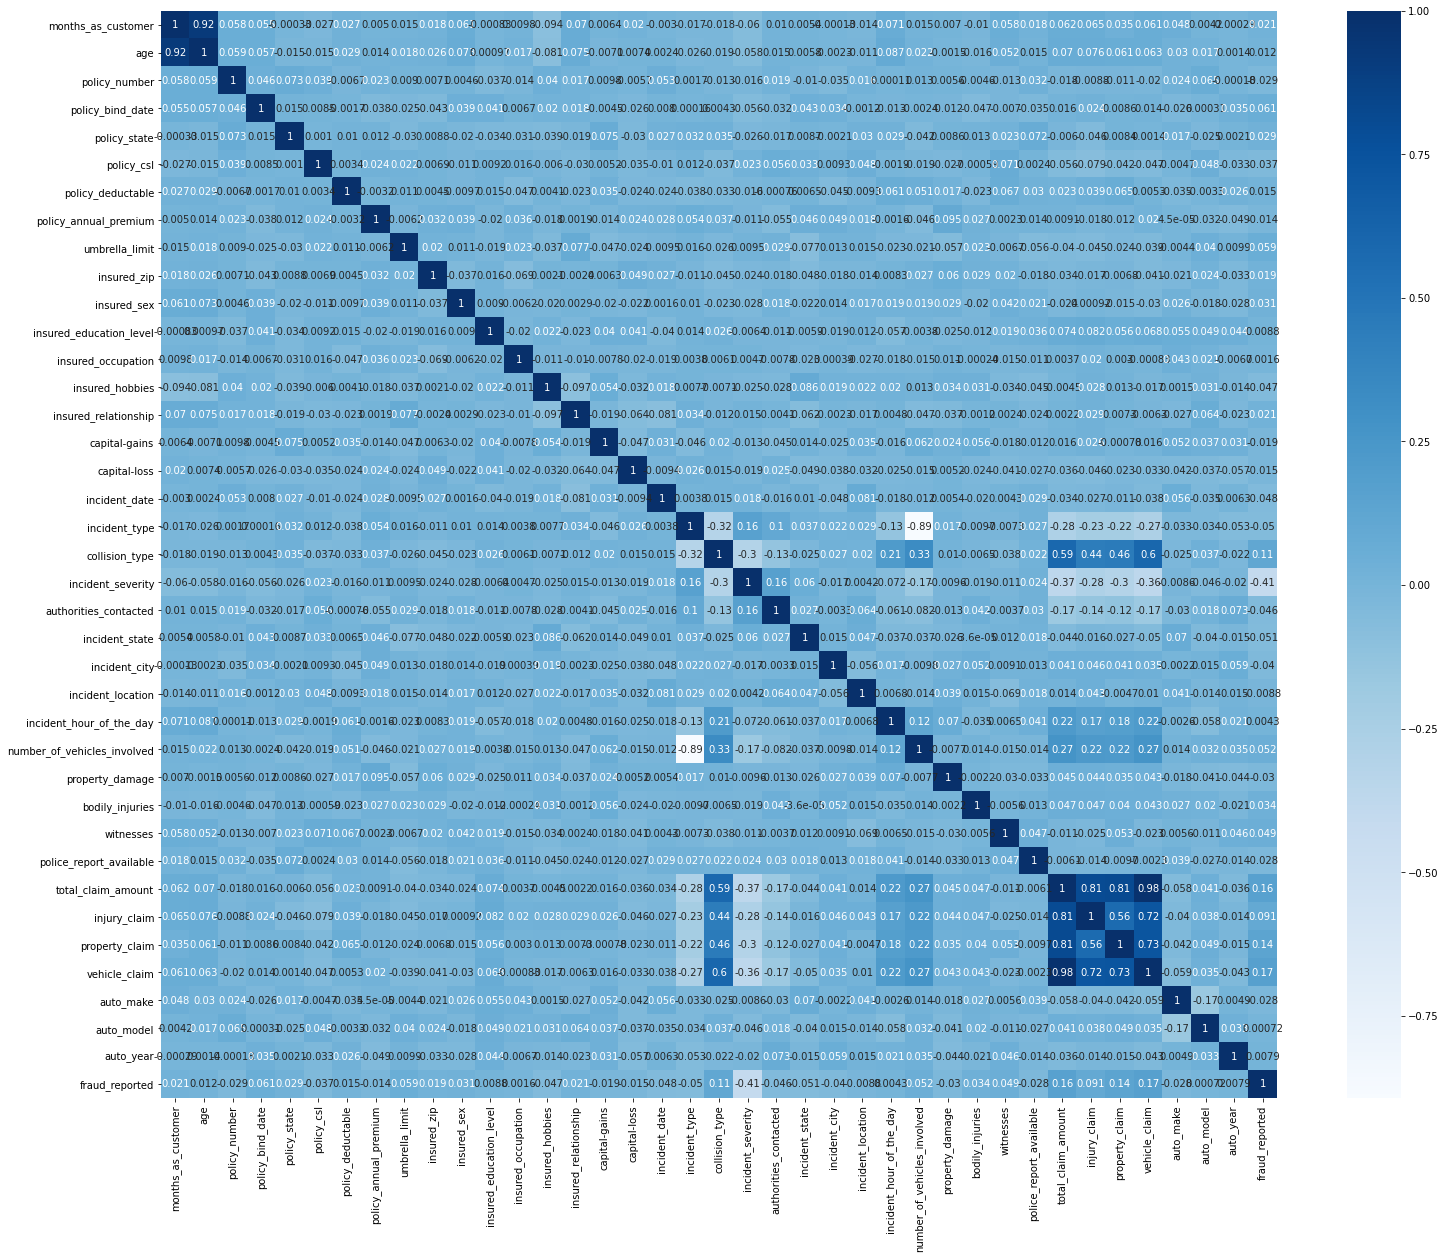

In [18]:
plt.figure(figsize=(25,20))
sns.heatmap(df_cor,cmap='Blues',annot=True)

fraud reported is highly correlated with total_claim_amount,injury_claim,property_claim and vehicle_claim.
fraud reported is least correlated with incident_severity.

<AxesSubplot:>

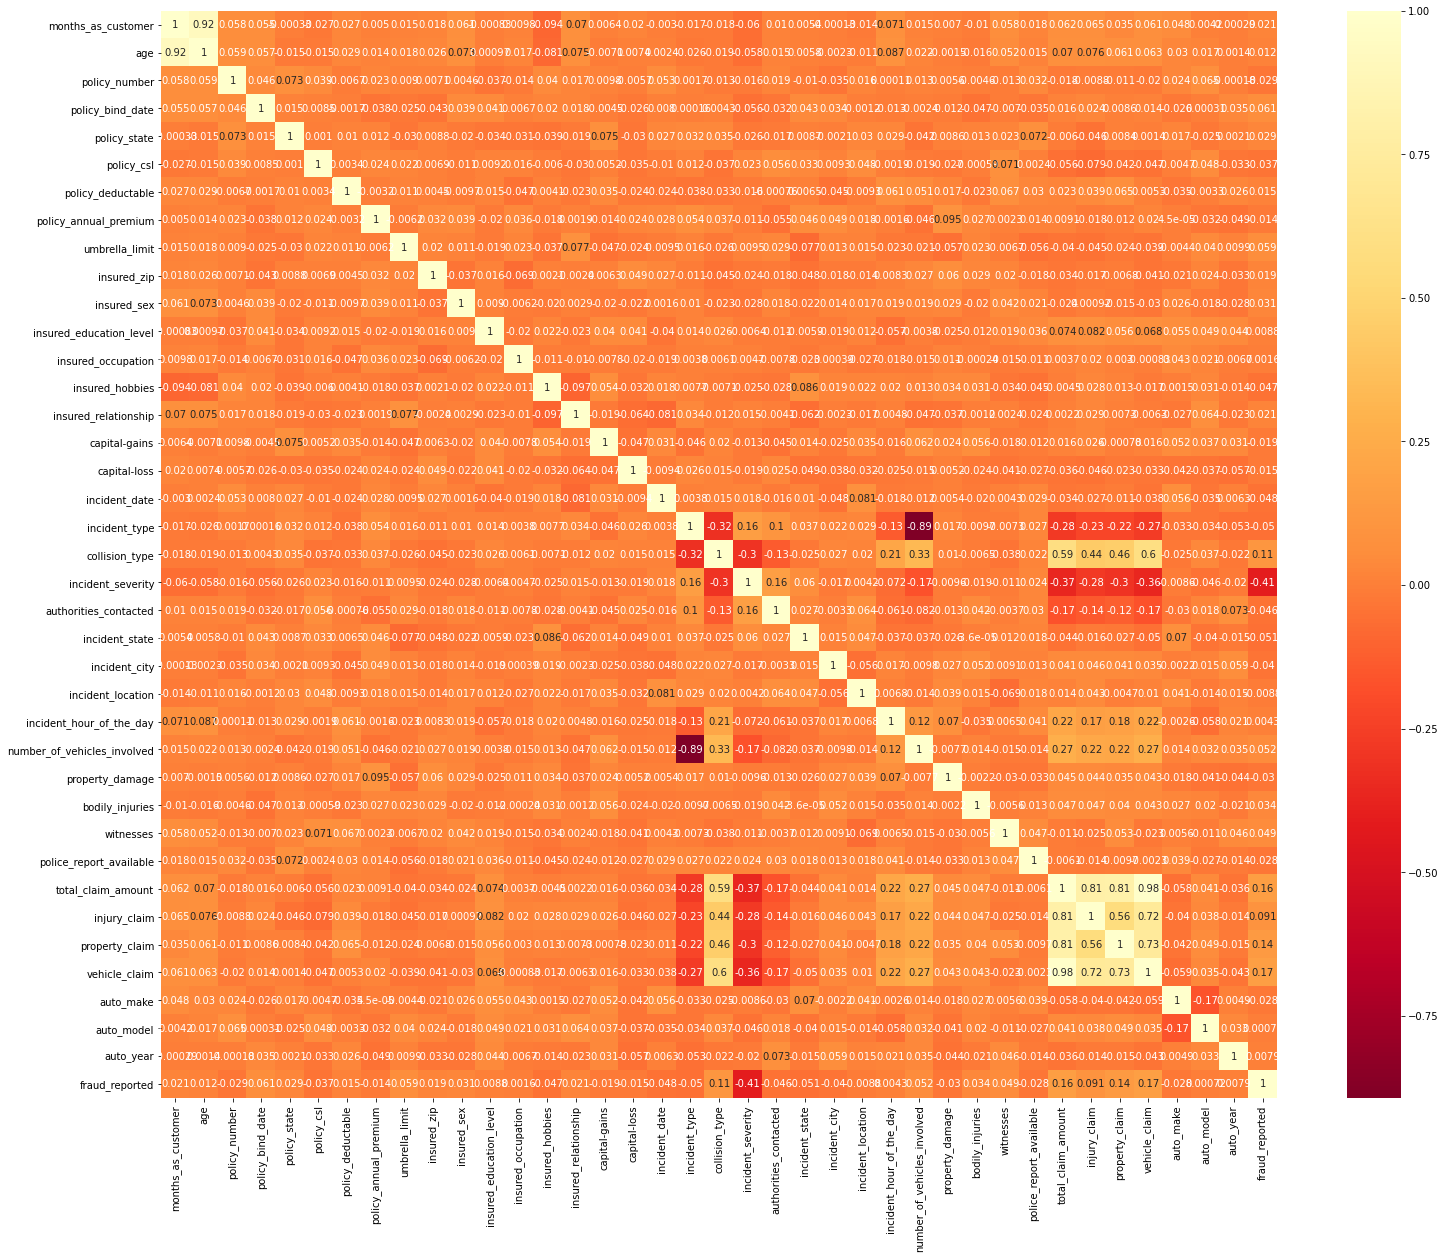

In [19]:
plt.figure(figsize=(25,20))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

fraud reported is highly correlated with total_claim_amount,injury_claim,property_claim and vehicle_claim.
fraud reported is least correlated with incident_severity

In [20]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

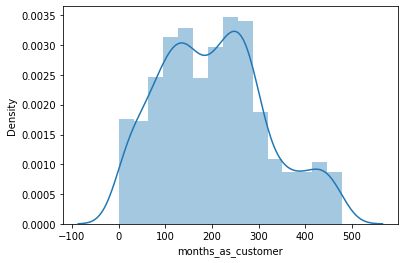

In [21]:
sns.distplot(df['months_as_customer'])

No Skewness Present.

<AxesSubplot:xlabel='age', ylabel='Density'>

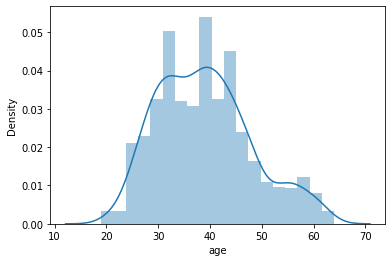

In [22]:
sns.distplot(df['age'])

No Skewness Present.

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

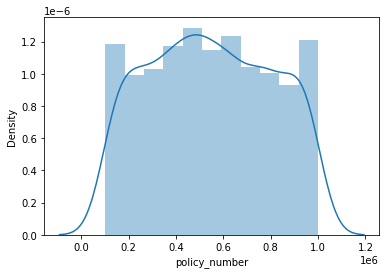

In [23]:
sns.distplot(df['policy_number'])

No Skewness Present.

<AxesSubplot:xlabel='policy_bind_date', ylabel='Density'>

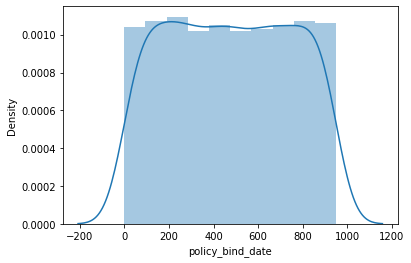

In [24]:
sns.distplot(df['policy_bind_date'])

No Skewness Present.

<AxesSubplot:xlabel='policy_state', ylabel='Density'>

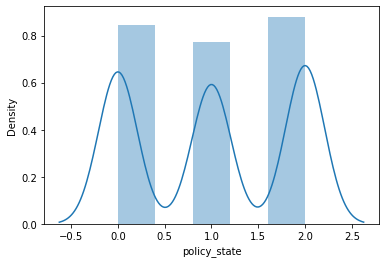

In [25]:
sns.distplot(df['policy_state'])

No Skewness Present.

<AxesSubplot:xlabel='policy_csl', ylabel='Density'>

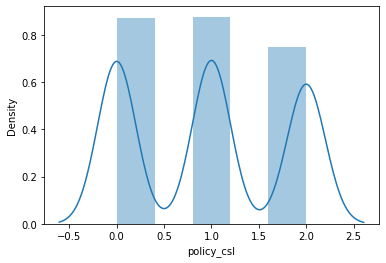

In [26]:
sns.distplot(df['policy_csl'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

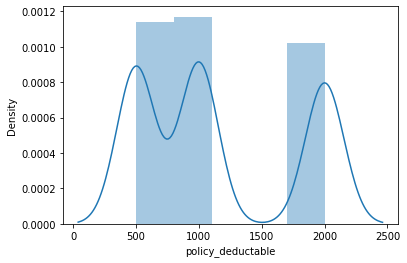

In [27]:
sns.distplot(df['policy_deductable'])

No Skewness Present.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

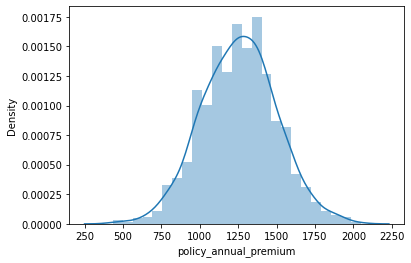

In [28]:
sns.distplot(df['policy_annual_premium'])

No Skewness Present.

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

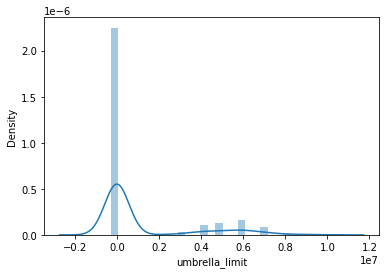

In [29]:
sns.distplot(df['umbrella_limit'])

Skewness Present.

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

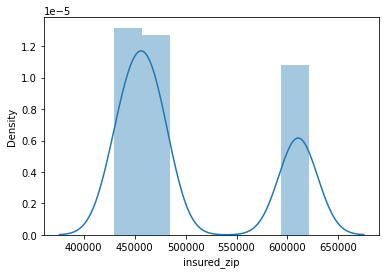

In [30]:
sns.distplot(df['insured_zip'])

Skewness Present.

<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

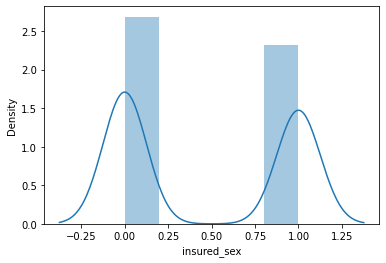

In [31]:
sns.distplot(df['insured_sex'])

No Skewness Present.

<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

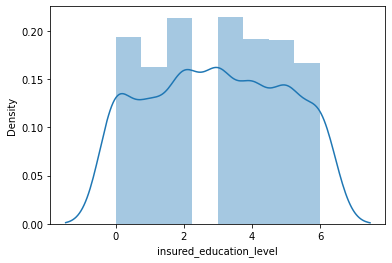

In [32]:
sns.distplot(df['insured_education_level'])

No Skewness Present.

<AxesSubplot:xlabel='insured_occupation', ylabel='Density'>

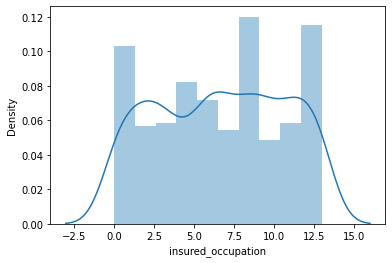

In [33]:
sns.distplot(df['insured_occupation'])

No Skewness Present.

<AxesSubplot:xlabel='insured_hobbies', ylabel='Density'>

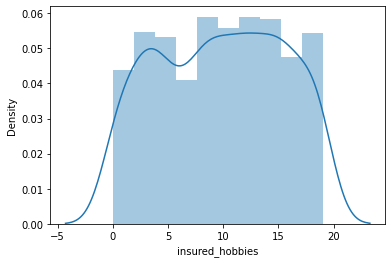

In [34]:
sns.distplot(df['insured_hobbies'])

No Skewness Present.

<AxesSubplot:xlabel='insured_relationship', ylabel='Density'>

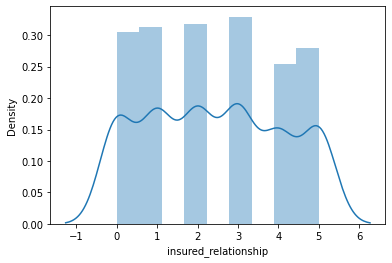

In [35]:
sns.distplot(df['insured_relationship'])

No Skewness Present.

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

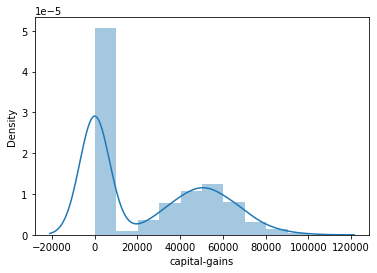

In [36]:
sns.distplot(df['capital-gains'])

No Skewness Present.

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

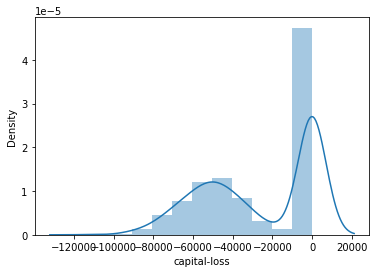

In [37]:
sns.distplot(df['capital-loss'])

No Skewness Present.

<AxesSubplot:xlabel='incident_date', ylabel='Density'>

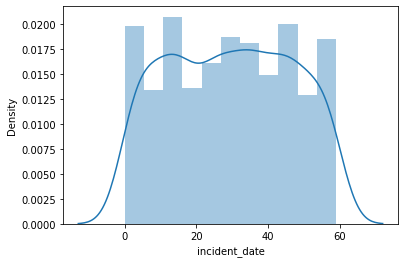

In [38]:
sns.distplot(df['incident_date'])

No Skewness Present.

<AxesSubplot:xlabel='incident_type', ylabel='Density'>

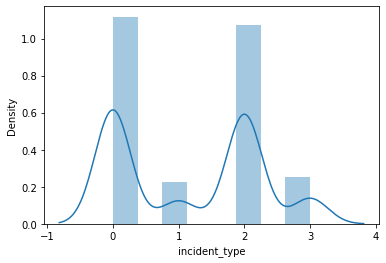

In [39]:
sns.distplot(df['incident_type'])

No Skewness Present.

<AxesSubplot:xlabel='collision_type', ylabel='Density'>

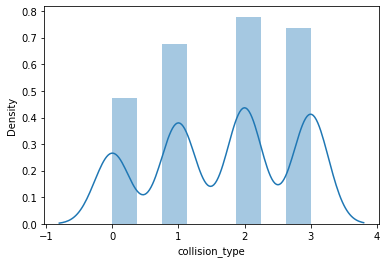

In [40]:
sns.distplot(df['collision_type'])

No Skewness Present.

<AxesSubplot:xlabel='incident_severity', ylabel='Density'>

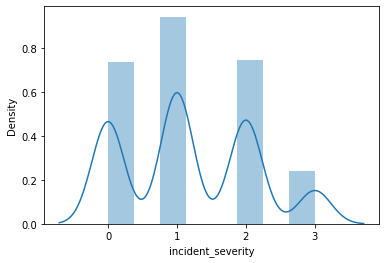

In [41]:
sns.distplot(df['incident_severity'])

No Skewness Present.

<AxesSubplot:xlabel='authorities_contacted', ylabel='Density'>

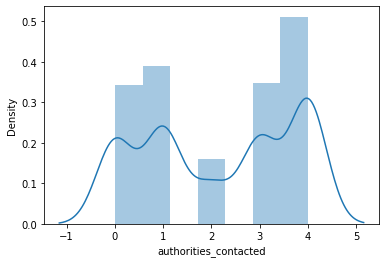

In [42]:
sns.distplot(df['authorities_contacted'])

No Skewness Present.

<AxesSubplot:xlabel='incident_state', ylabel='Density'>

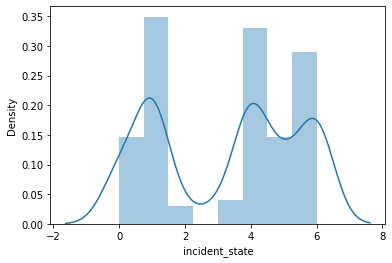

In [43]:
sns.distplot(df['incident_state'])

No Skewness Present.

<AxesSubplot:xlabel='incident_state', ylabel='Density'>

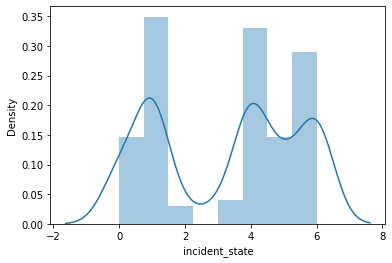

In [44]:
sns.distplot(df['incident_state'])

No Skewness Present.

<AxesSubplot:xlabel='incident_location', ylabel='Density'>

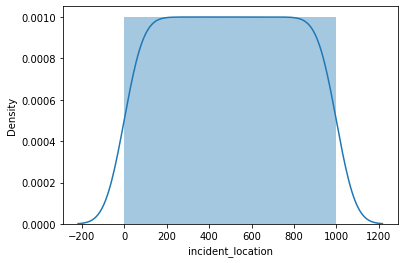

In [45]:
sns.distplot(df['incident_location'])

No Skewness Present.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

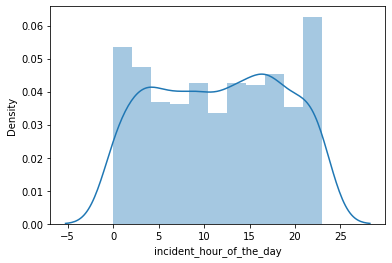

In [46]:
sns.distplot(df['incident_hour_of_the_day'])

No Skewness Present.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

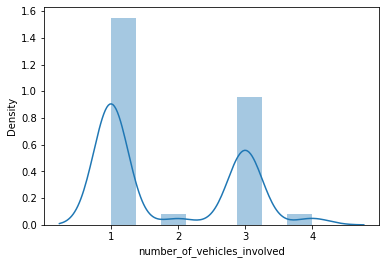

In [47]:
sns.distplot(df['number_of_vehicles_involved'])

No Skewness Present.

<AxesSubplot:xlabel='property_damage', ylabel='Density'>

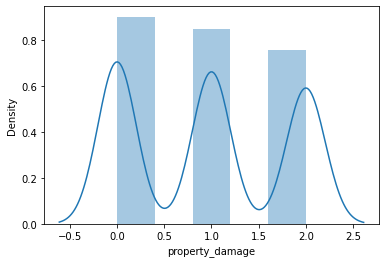

In [48]:
sns.distplot(df['property_damage'])

No Skewness Present.

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

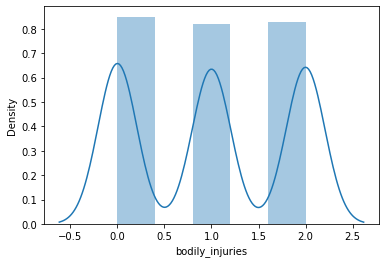

In [49]:
sns.distplot(df['bodily_injuries'])

No Skewness Present.

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

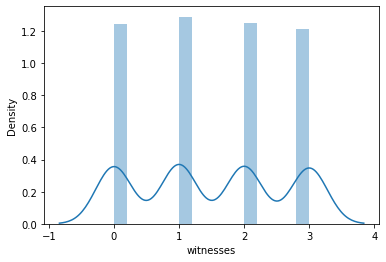

In [50]:
sns.distplot(df['witnesses'])

No Skewness Present.

<AxesSubplot:xlabel='police_report_available', ylabel='Density'>

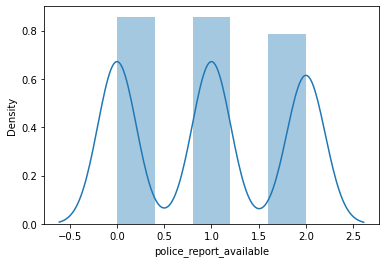

In [51]:
sns.distplot(df['police_report_available'])

No Skewness Present.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

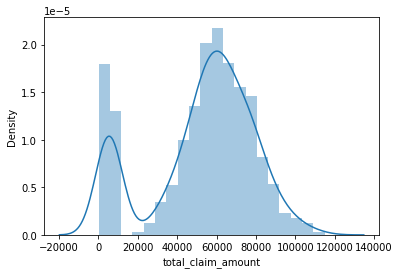

In [52]:
sns.distplot(df['total_claim_amount'])

No Skewness Present.

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

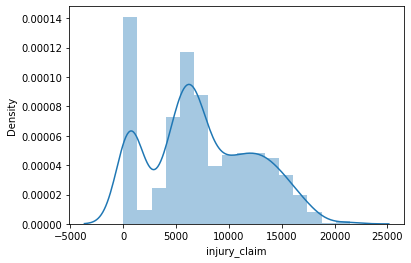

In [53]:
sns.distplot(df['injury_claim'])

No Skewness Present.

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

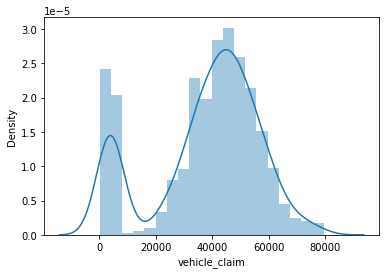

In [54]:
sns.distplot(df['vehicle_claim'])

Skewness Present.

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

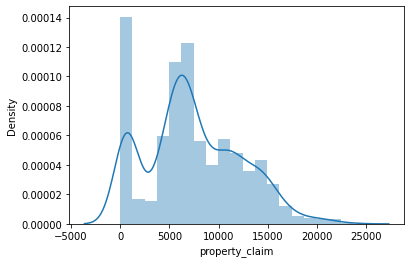

In [55]:
sns.distplot(df['property_claim'])

No Skewness Present.

<AxesSubplot:xlabel='auto_make', ylabel='Density'>

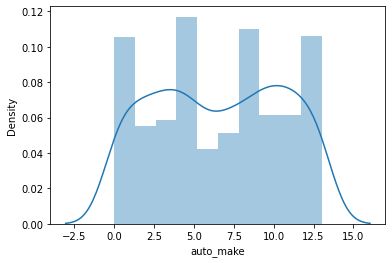

In [56]:
sns.distplot(df['auto_make'])

No Skewness Present.

<AxesSubplot:xlabel='auto_model', ylabel='Density'>

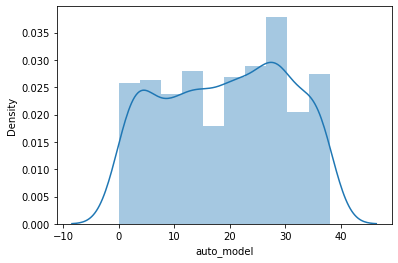

In [57]:
sns.distplot(df['auto_model'])

No Skewness Present.

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

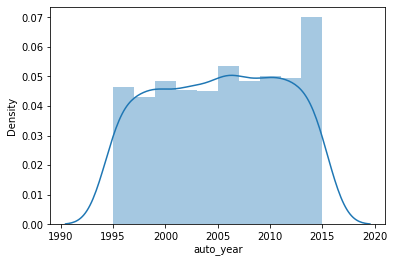

In [58]:
sns.distplot(df['auto_year'])

No Skewness Present.

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

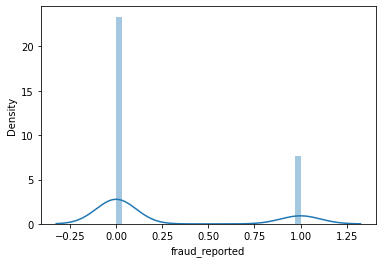

In [59]:
sns.distplot(df['fraud_reported'])

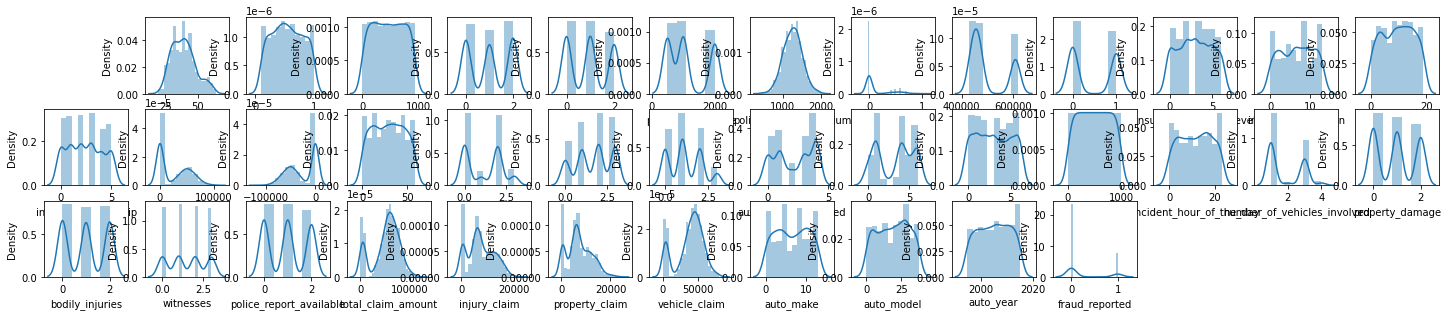

In [60]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [61]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

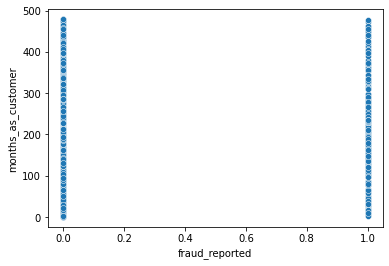

In [62]:
sns.scatterplot(x='fraud_reported',y='months_as_customer',data=df)

months_as_customer has a range from 0 to 500.

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

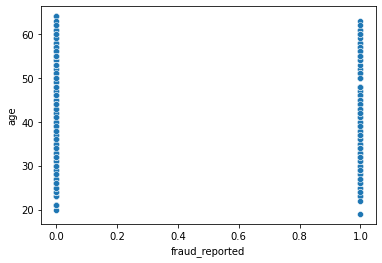

In [63]:
sns.scatterplot(x='fraud_reported',y='age',data=df)

age range is from 20 to 60.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_number'>

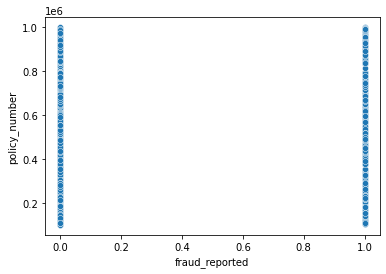

In [64]:
sns.scatterplot(x='fraud_reported',y='policy_number',data=df)

policy_number range from 0.0 to 1.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_bind_date'>

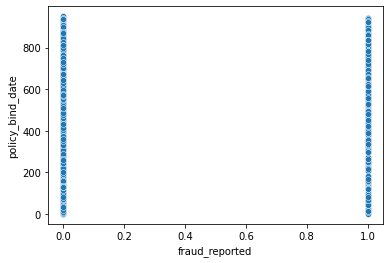

In [65]:
sns.scatterplot(x='fraud_reported',y='policy_bind_date',data=df)

policy_bind_date range from 0 to 800.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_state'>

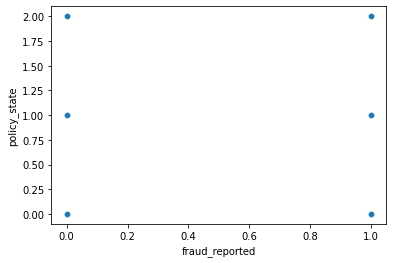

In [66]:
sns.scatterplot(x='fraud_reported',y='policy_state',data=df)

policy_state range from 0,1 and 2.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_csl'>

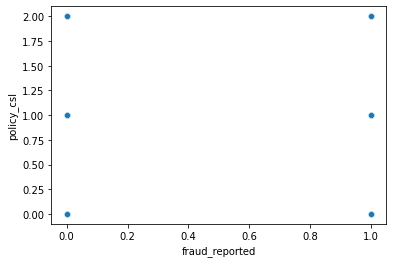

In [67]:
sns.scatterplot(x='fraud_reported',y='policy_csl',data=df)

policy_csl has a range from 0.0,1.0 and 2.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

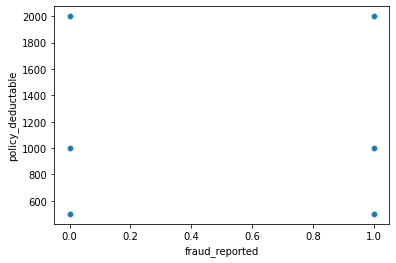

In [68]:
sns.scatterplot(x='fraud_reported',y='policy_deductable',data=df)

policy_deductable range 0,1000 and 2000.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

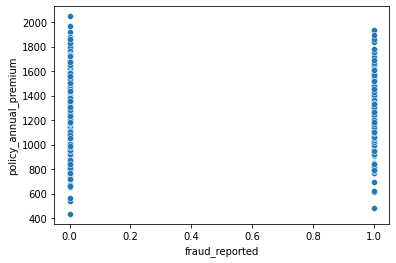

In [69]:
sns.scatterplot(x='fraud_reported',y='policy_annual_premium',data=df)

policy_annual_premium starts from 400 and it goes to 2000.

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

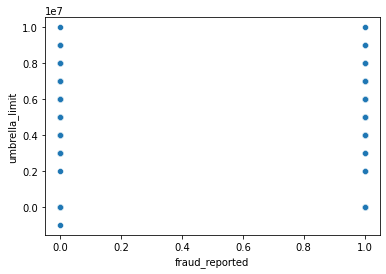

In [70]:
sns.scatterplot(x='fraud_reported',y='umbrella_limit',data=df)

umbrella_limit has a range from 0.0 to 1.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

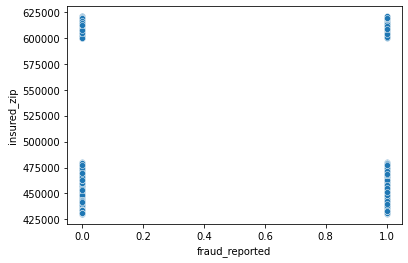

In [71]:
sns.scatterplot(x='fraud_reported',y='insured_zip',data=df)

insured_zip has a range from 425000 to 475000 and from 600000 to 625000.

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_sex'>

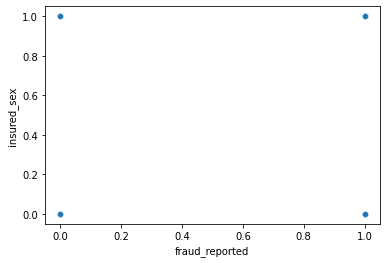

In [72]:
sns.scatterplot(x='fraud_reported',y='insured_sex',data=df)

insured_sex has a range from 0.0 to 1.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_education_level'>

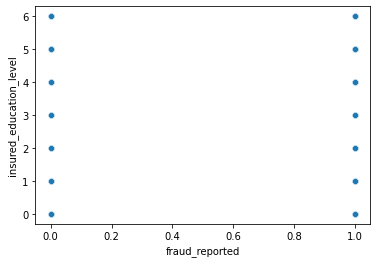

In [73]:
sns.scatterplot(x='fraud_reported',y='insured_education_level',data=df)

insured_education_level has a range from 0 to 6.

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_occupation'>

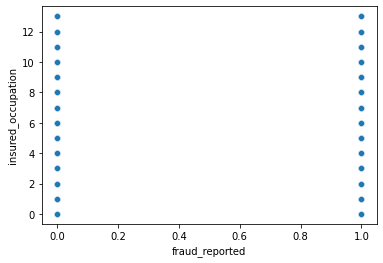

In [74]:
sns.scatterplot(x='fraud_reported',y='insured_occupation',data=df)

insured_occupation range starts from 0 to 12.

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_hobbies'>

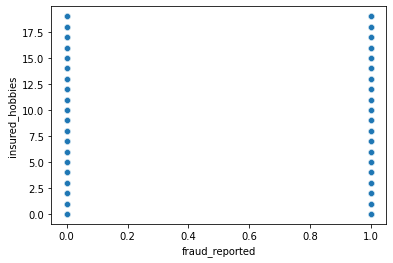

In [75]:
sns.scatterplot(x='fraud_reported',y='insured_hobbies',data=df)

insured_hobbies range start from 0 to 17.5.

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_relationship'>

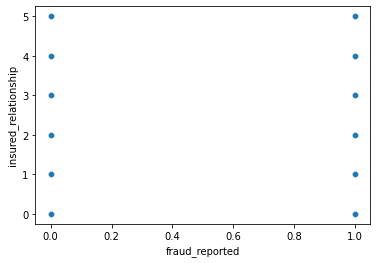

In [76]:
sns.scatterplot(x='fraud_reported',y='insured_relationship',data=df)

insured_relationship has a range from 0 to 5.

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

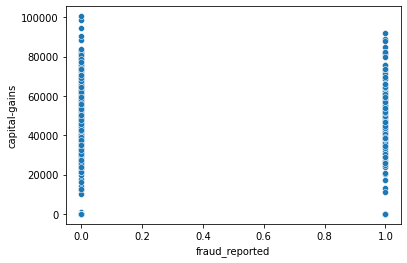

In [77]:
sns.scatterplot(x='fraud_reported',y='capital-gains',data=df)

capital-gains has range from 0 to 100000.

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

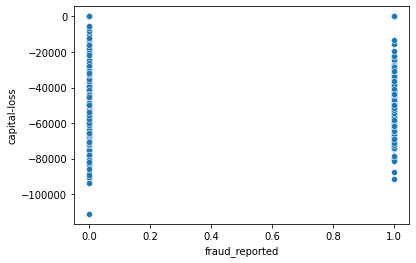

In [78]:
sns.scatterplot(x='fraud_reported',y='capital-loss',data=df)

capital-loss has a range from 0 to -20000.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_date'>

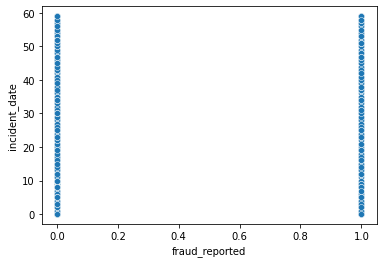

In [79]:
sns.scatterplot(x='fraud_reported',y='incident_date',data=df)

incident_date has a range from 0 to 50 with respect to incident_date.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_type'>

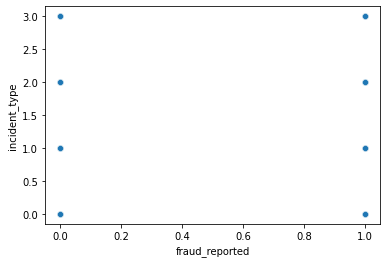

In [80]:
sns.scatterplot(x='fraud_reported',y='incident_type',data=df)

incident_type has range from 0.0 to 3.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='collision_type'>

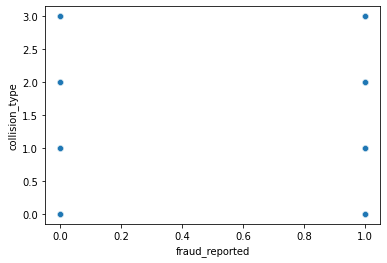

In [81]:
sns.scatterplot(x='fraud_reported',y='collision_type',data=df)

collision_type has a range from 0.0 to 3.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_severity'>

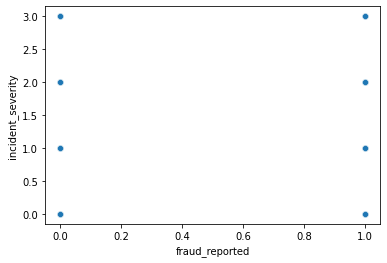

In [82]:
sns.scatterplot(x='fraud_reported',y='incident_severity',data=df)

incident_severity has a range from 0.0 to 3.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='authorities_contacted'>

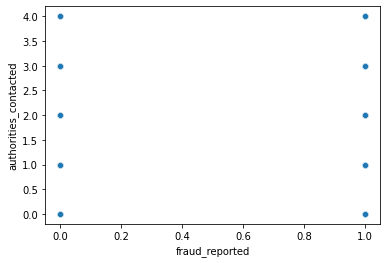

In [83]:
sns.scatterplot(x='fraud_reported',y='authorities_contacted',data=df)

authorities_contacted has a range from 0.0 to 4.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_state'>

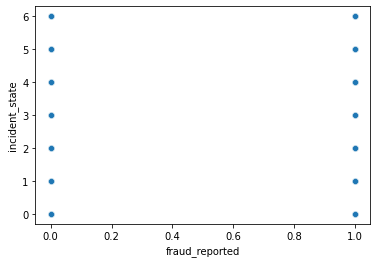

In [84]:
sns.scatterplot(x='fraud_reported',y='incident_state',data=df)

incident_state has a range from 0 to 6.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_city'>

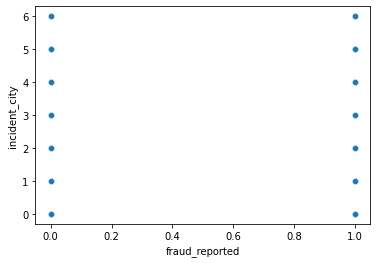

In [85]:
sns.scatterplot(x='fraud_reported',y='incident_city',data=df)

incident_city has a range from 0 to 6.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_location'>

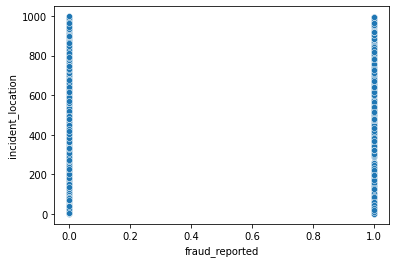

In [86]:
sns.scatterplot(x='fraud_reported',y='incident_location',data=df)

incident_location has a range from 0 to 1000.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

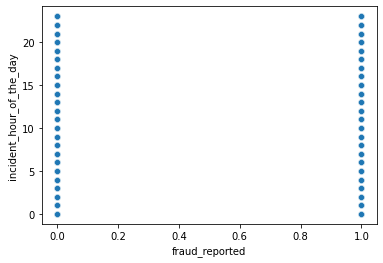

In [87]:
sns.scatterplot(x='fraud_reported',y='incident_hour_of_the_day',data=df)

incident_hour_of_the_day has a range from 0 to 20.

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

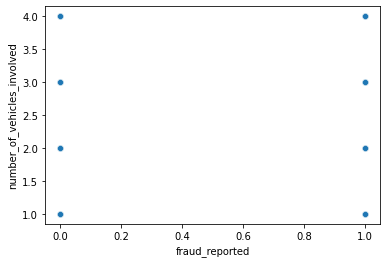

In [88]:
sns.scatterplot(x='fraud_reported',y='number_of_vehicles_involved',data=df)

number_of_vehicles_involved has a range from 1.0 to 4.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='bodily_injuries'>

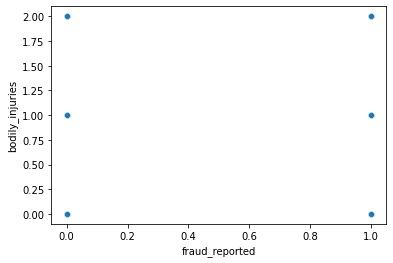

In [89]:
sns.scatterplot(x='fraud_reported',y='bodily_injuries',data=df)

bodily_injuries has a range from 0.0 to 2.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

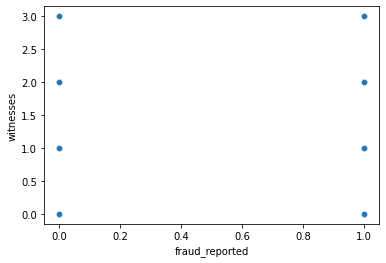

In [90]:
sns.scatterplot(x='fraud_reported',y='witnesses',data=df)

witnesses has a range from 0.0 to 3.0.

<AxesSubplot:xlabel='fraud_reported', ylabel='police_report_available'>

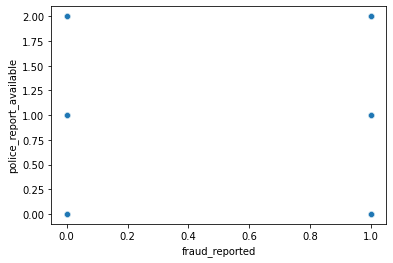

In [91]:
sns.scatterplot(x='fraud_reported',y='police_report_available',data=df)

police_report_available has a range from 0.00 to 2.00.

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

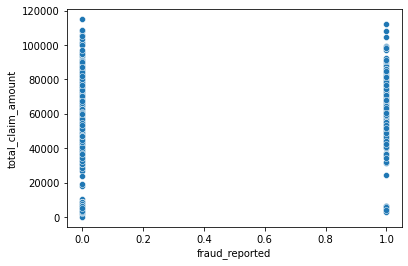

In [92]:
sns.scatterplot(x='fraud_reported',y='total_claim_amount',data=df)

total_claim_amount has a range from 0 to 120000.

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

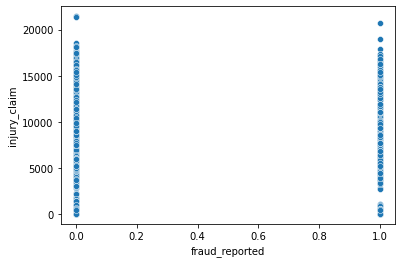

In [93]:
sns.scatterplot(x='fraud_reported',y='injury_claim',data=df)

injury_claim has a range from 0 to 20000.

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

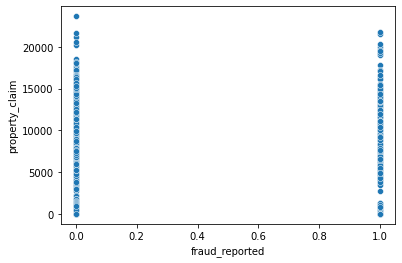

In [94]:
sns.scatterplot(x='fraud_reported',y='property_claim',data=df)

property_claim has a range from 0 to 20000.

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

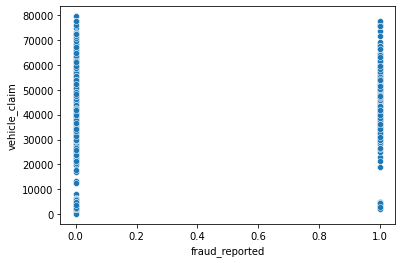

In [95]:
sns.scatterplot(x='fraud_reported',y='vehicle_claim',data=df)

vehicle_claim has a range form 0 to 80000.

<AxesSubplot:xlabel='fraud_reported', ylabel='auto_make'>

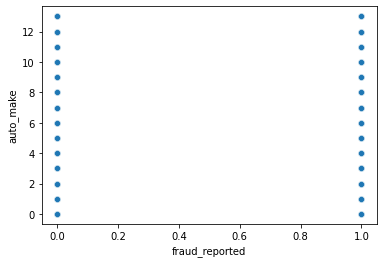

In [96]:
sns.scatterplot(x='fraud_reported',y='auto_make',data=df)

auto_make has a range from 0 to 12.

<AxesSubplot:xlabel='fraud_reported', ylabel='auto_model'>

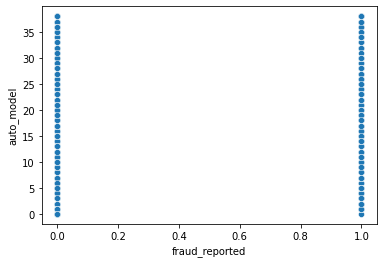

In [97]:
sns.scatterplot(x='fraud_reported',y='auto_model',data=df)

auto_model has a range from 0 to 35.

<AxesSubplot:xlabel='fraud_reported', ylabel='auto_year'>

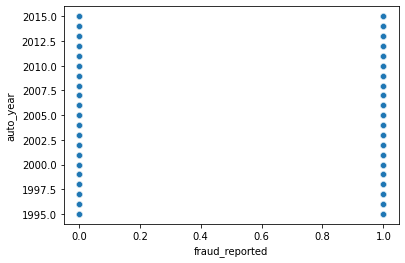

In [98]:
sns.scatterplot(x='fraud_reported',y='auto_year',data=df)

auto_year has a rnage from 1995 to 2015.

In [99]:
#sns.pairplot(df)

In [100]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:>

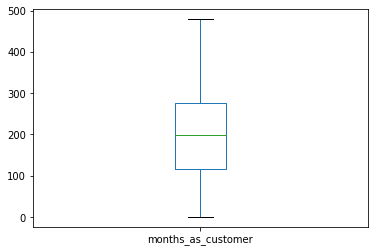

In [101]:
df['months_as_customer'].plot.box()

No Outliers present.

<AxesSubplot:>

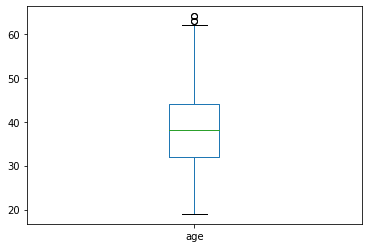

In [102]:
df['age'].plot.box()

Outliers present.

<AxesSubplot:>

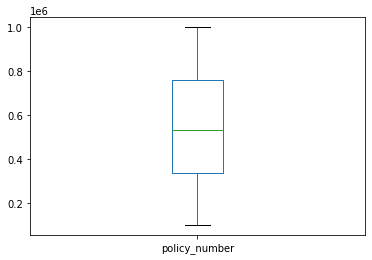

In [103]:
df['policy_number'].plot.box()

No Outliers present.

<AxesSubplot:>

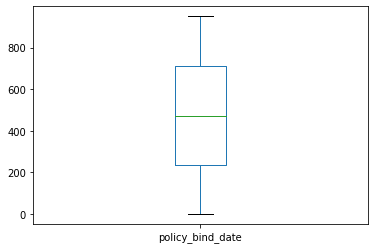

In [104]:
df['policy_bind_date'].plot.box()

No Outliers present.

<AxesSubplot:>

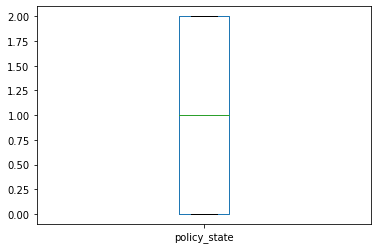

In [105]:
df['policy_state'].plot.box()

<AxesSubplot:>

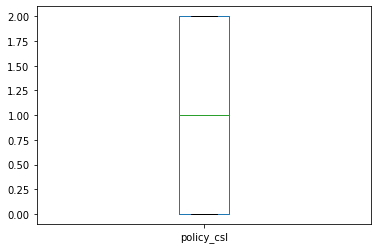

In [106]:
df['policy_csl'].plot.box()

No Outliers present.

<AxesSubplot:>

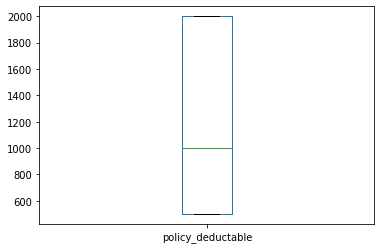

In [107]:
df['policy_deductable'].plot.box()

No Outliers present.

<AxesSubplot:>

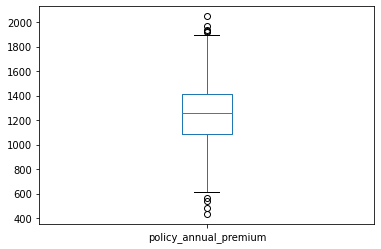

In [108]:
df['policy_annual_premium'].plot.box()

Outliers present.

<AxesSubplot:>

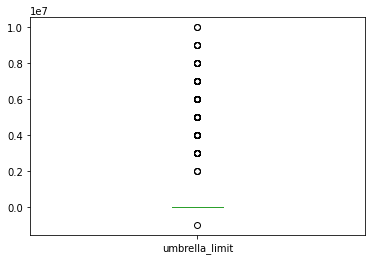

In [109]:
df['umbrella_limit'].plot.box()

 Outliers present.

<AxesSubplot:>

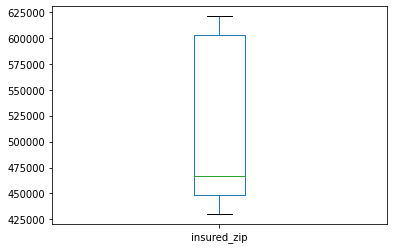

In [110]:
df['insured_zip'].plot.box()

No Outliers present.

<AxesSubplot:>

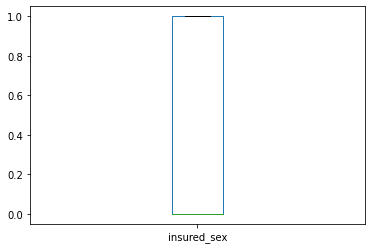

In [111]:
df['insured_sex'].plot.box()

No Outliers present.

<AxesSubplot:>

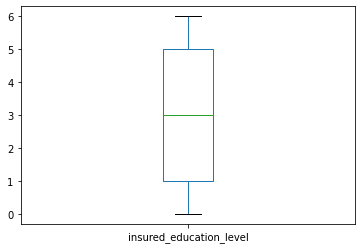

In [112]:
df['insured_education_level'].plot.box()

No Outliers present.

<AxesSubplot:>

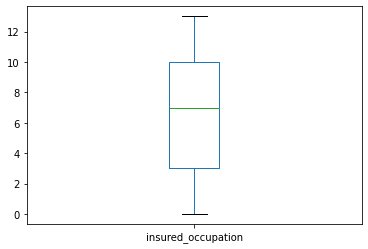

In [113]:
df['insured_occupation'].plot.box()

No Outliers present.

<AxesSubplot:>

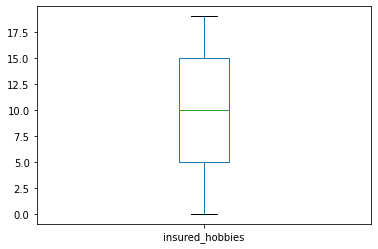

In [114]:
df['insured_hobbies'].plot.box()

No Outliers present.

<AxesSubplot:>

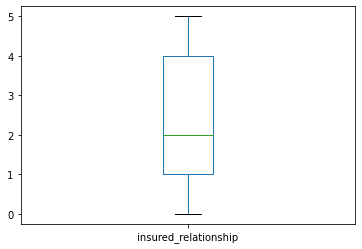

In [115]:
df['insured_relationship'].plot.box()

No Outliers present.

<AxesSubplot:>

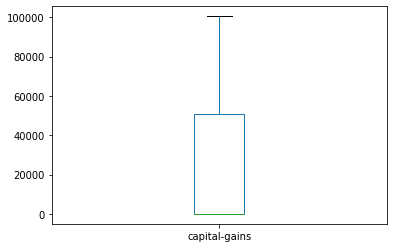

In [116]:
df['capital-gains'].plot.box()


No Outliers present.

<AxesSubplot:>

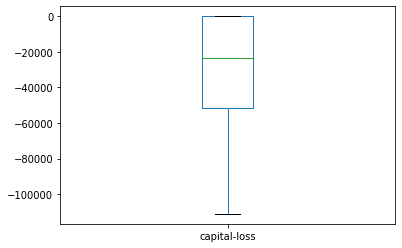

In [117]:
df['capital-loss'].plot.box()

No Outliers present.

<AxesSubplot:>

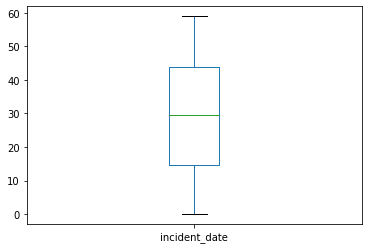

In [118]:
df['incident_date'].plot.box()

No Outliers present.

<AxesSubplot:>

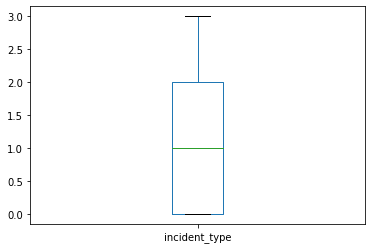

In [119]:
df['incident_type'].plot.box()

No Outliers present.

(<AxesSubplot:>,)

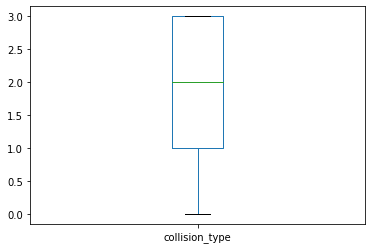

In [120]:
  df['collision_type'].plot.box(),

No Outliers present.

(<AxesSubplot:>,)

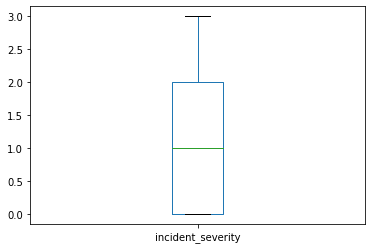

In [121]:
  df['incident_severity'].plot.box(),

No Outliers present.

<AxesSubplot:>

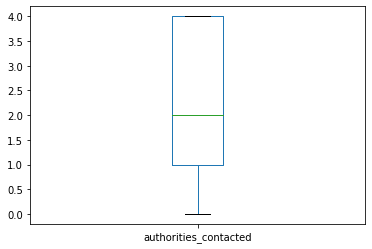

In [122]:
 df['authorities_contacted'].plot.box()
       

No Outliers present.

<AxesSubplot:>

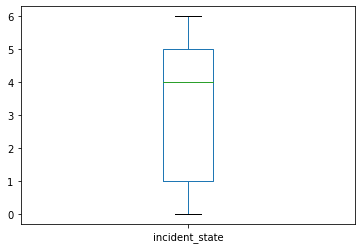

In [123]:
 df['incident_state'].plot.box()
        

No Outliers present.

<AxesSubplot:>

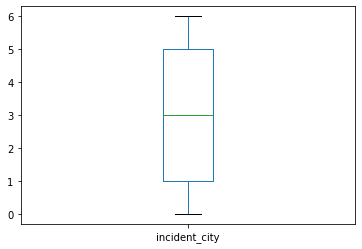

In [124]:
df['incident_city'].plot.box()
        

No Outliers present.

<AxesSubplot:>

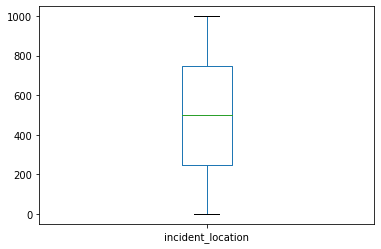

In [125]:
df['incident_location'].plot.box()
        

No Outliers present.

<AxesSubplot:>

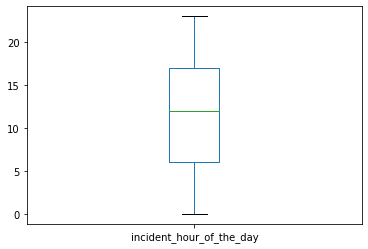

In [126]:
 df['incident_hour_of_the_day'].plot.box()
       

No Outliers present.

<AxesSubplot:>

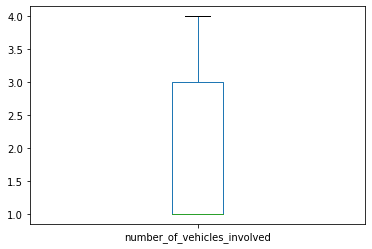

In [127]:
df['number_of_vehicles_involved'].plot.box()
   

No Outliers present.

<AxesSubplot:>

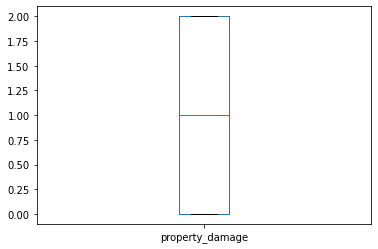

In [128]:
 df['property_damage'].plot.box()
   

No Outliers present.

<AxesSubplot:>

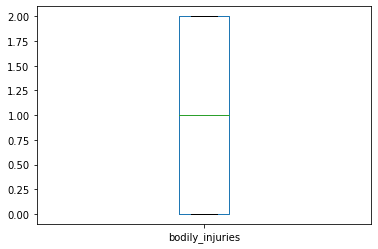

In [129]:
 df['bodily_injuries'].plot.box()
    
      

No Outliers present.

<AxesSubplot:>

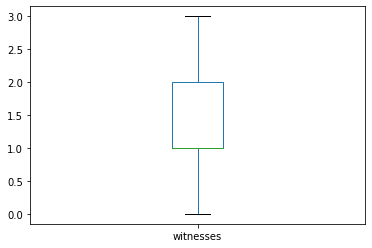

In [130]:
 df['witnesses'].plot.box()
     

No Outliers present.

<AxesSubplot:>

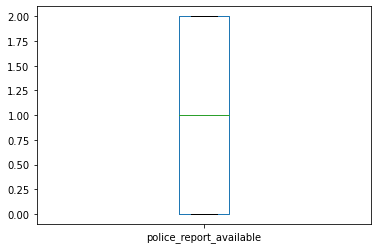

In [131]:
   df['police_report_available'].plot.box()
 

No Outliers present.

<AxesSubplot:>

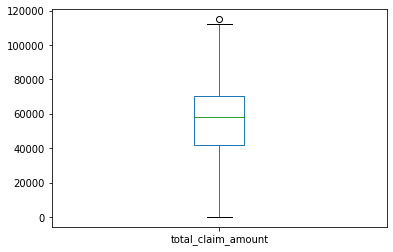

In [132]:
        df['total_claim_amount'].plot.box()
      

 Outliers present.

<AxesSubplot:>

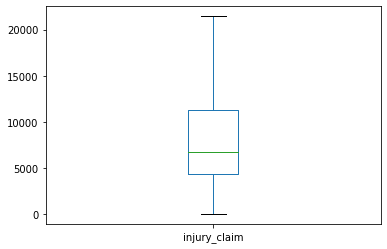

In [133]:
 df['injury_claim'].plot.box()
  

No Outliers present.

<AxesSubplot:>

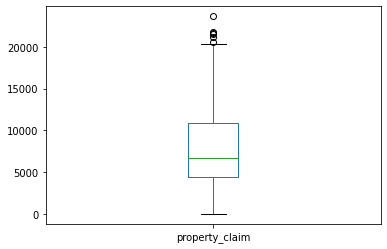

In [134]:
  df['property_claim'].plot.box()
   

Outliers present.

(<AxesSubplot:>,)

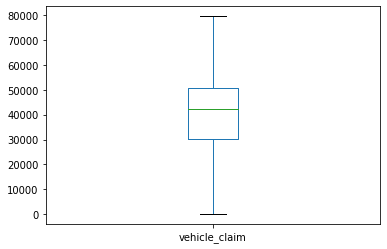

In [135]:
 df['vehicle_claim'].plot.box(),
    

No Outliers present.

(<AxesSubplot:>,)

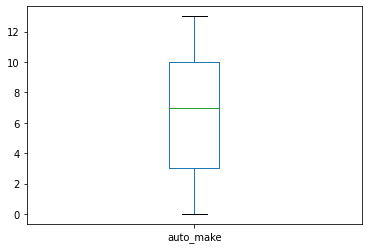

In [136]:
df['auto_make'].plot.box(),
     

No Outliers present.

<AxesSubplot:>

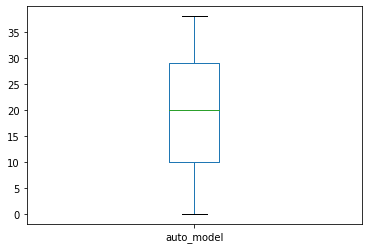

In [137]:
  df['auto_model'].plot.box()
        

No Outliers present.

<AxesSubplot:>

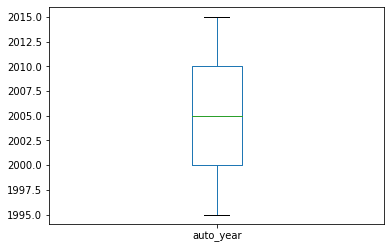

In [138]:
df['auto_year'].plot.box()

No Outliers present.

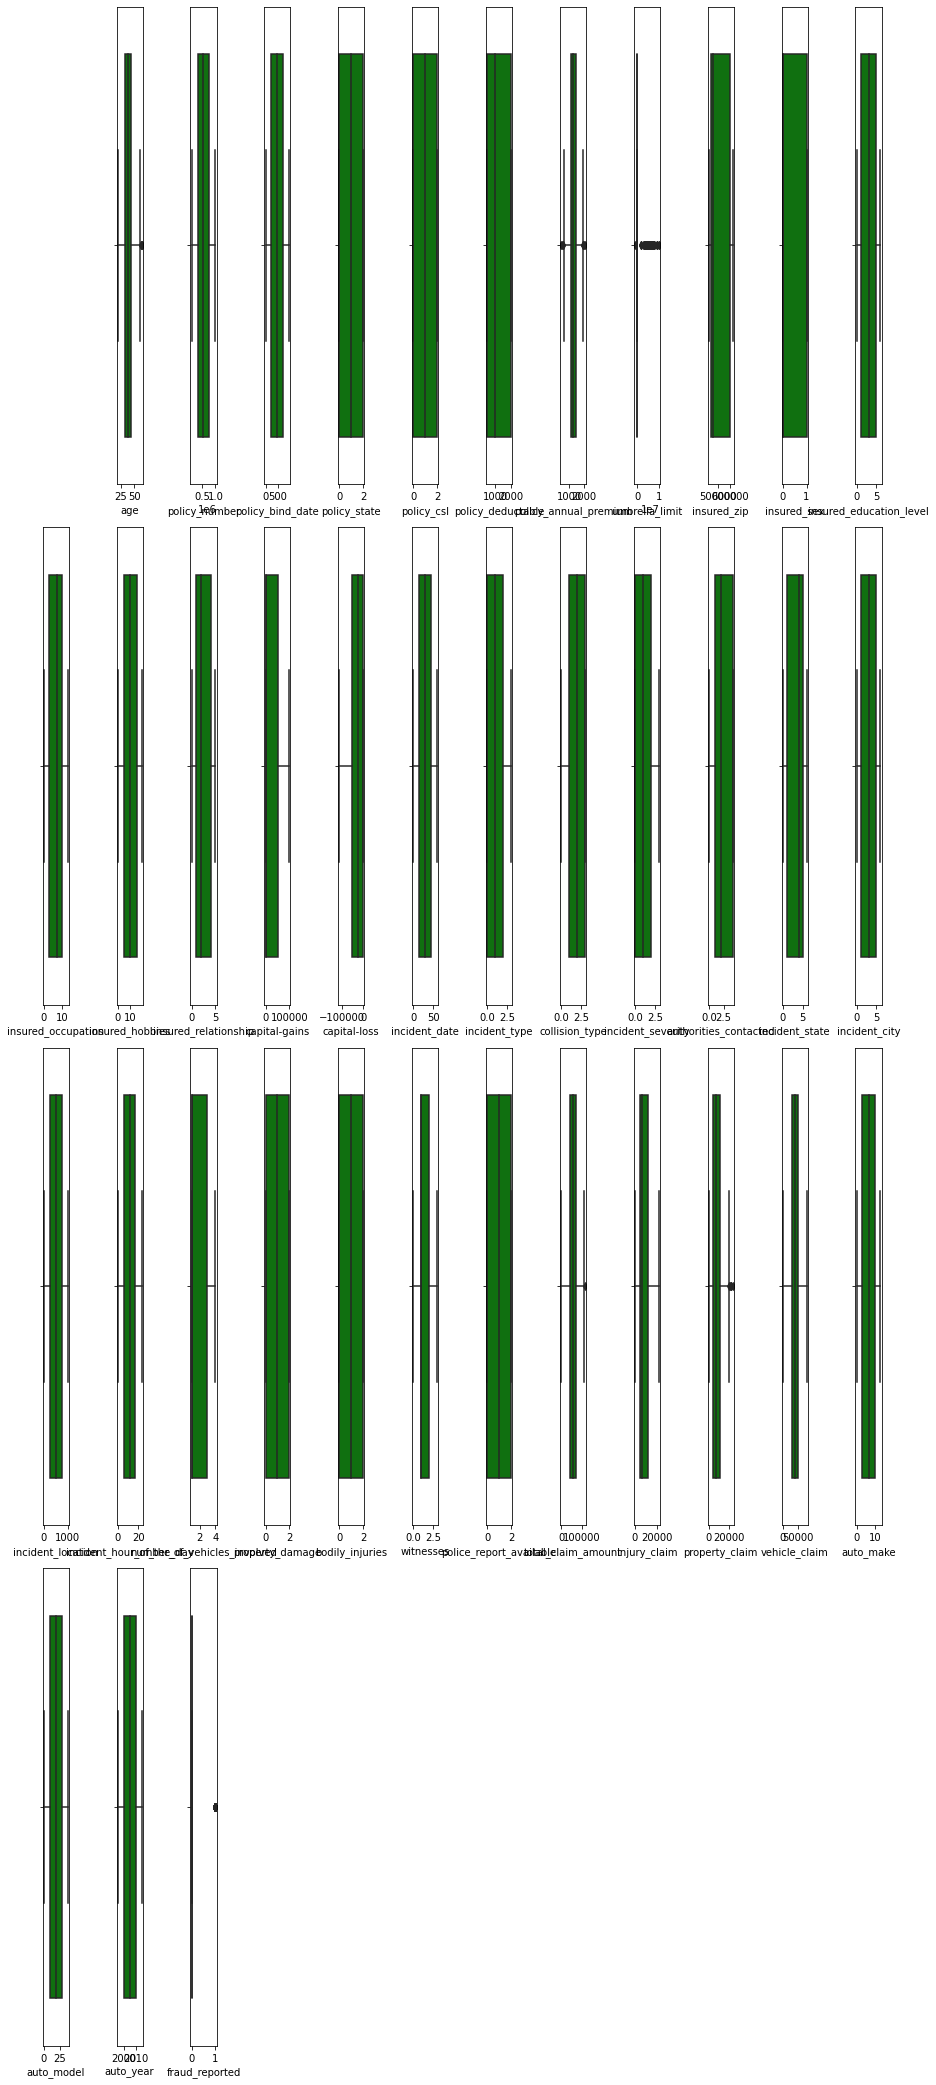

In [139]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing outliers

In [140]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [141]:
from scipy.stats import zscore
z=np.abs(zscore(df[['age','policy_annual_premium','total_claim_amount','property_claim','vehicle_claim']]))
print(np.where(z>3))

(array([229, 248, 500, 763], dtype=int64), array([1, 1, 3, 1], dtype=int64))


In [142]:
df_new=df[(z<3).all(axis=1)]

In [143]:
df_new.shape

(996, 39)

In [144]:
df.shape

(1000, 39)

1000-996=4 outliers has removed from DataSet.

# Removing skewness

In [145]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [146]:
df['umbrella_limit']=np.log1p(df['umbrella_limit'])

In [147]:
df['insured_zip']=np.log1p(df['insured_zip'])

In [148]:
df['vehicle_claim']=np.log1p(df['vehicle_claim'])

In [149]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [150]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0.000000,13.052226,...,2,2,71610,6510,13020,10.860555,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,15.424949,13.056602,...,0,0,5070,780,780,8.163656,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,15.424949,12.973011,...,3,1,34650,7700,3850,10.047631,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,15.607270,13.318124,...,2,1,63400,6340,6340,10.834095,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,15.607270,13.322373,...,1,1,6500,1300,650,8.423102,0,31,2009,0


In [151]:
x=df_new.iloc[:,0:38]
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,0,1,2,46980,5220,5220,36540,1,5,1998


In [152]:
y=df_new.iloc[:,38]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 996, dtype: int32

In [153]:
def get_score(model):

    max_i=0
    max_score=0


    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc= accuracy_score(y_test,pred)
        #print("accuracy score",acc)

        if(acc > max_score):
            max_score=acc
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=43)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
list=[lr,dt]

for var in list:
    print(var)
    get_score(var)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
max score 0.790273556231003
max i 108
[[242   3]
 [ 82   2]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       245
           1       0.40      0.02      0.04        84

    accuracy                           0.74       329
   macro avg       0.57      0.51      0.45       329
weighted avg       0.66      0.74      0.64       329

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
         

# AUC ROC Curve

In [155]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba=dt.predict_proba(x_test)[:,0]
y_pred_proba

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1.

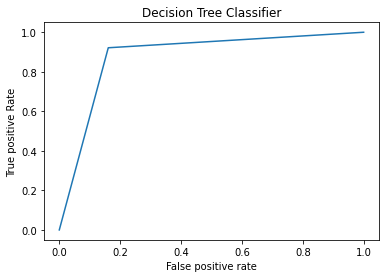

0.8802840315379501

In [156]:
tpr,fpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# cross validation

In [157]:
score=cross_val_score(dt,x,y,cv=7)
print(score)
print(score.mean(),score.std())

[0.79166667 0.75352113 0.77464789 0.78873239 0.78873239 0.8028169
 0.80985915]
0.7871395036887995 0.017211992930623594


In [158]:
score=cross_val_score(lr,x,y,cv=7)
print(score)
print(score.mean(),score.std())

[0.75       0.75352113 0.73239437 0.73943662 0.75352113 0.75352113
 0.75352113]
0.7479879275653923 0.007953414638250441


# Grid Search CV

In [159]:
from sklearn.model_selection import GridSearchCV
param={'criterion':['gini','entropy']}
GSC=GridSearchCV(dt,param,scoring='accuracy',cv=5)
GSC.fit(x,y)
print(GSC.best_params_)
print(GSC.best_score_)

{'criterion': 'entropy'}
0.7931726907630522


# Ensemble methods

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7781155015197568
[[234   8]
 [ 65  22]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       242
           1       0.73      0.25      0.38        87

    accuracy                           0.78       329
   macro avg       0.76      0.61      0.62       329
weighted avg       0.77      0.78      0.74       329



In [161]:
from sklearn.ensemble import AdaBoostClassifier

ab=AdaBoostClassifier(n_estimators=100,random_state=42)
#by default n_estimators=100
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.78419452887538
[[222  20]
 [ 51  36]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       242
           1       0.64      0.41      0.50        87

    accuracy                           0.78       329
   macro avg       0.73      0.67      0.68       329
weighted avg       0.77      0.78      0.77       329



Logistic Regression is the best model as the difference between crossvalidation score and model is minimum. 

# Saving the Model

In [162]:
import joblib
joblib.dump(lr,'insuarance.obj')

['insuarance.obj']

In [163]:
file=joblib.load('insuarance.obj')

In [164]:
file.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,